## Introduction to Attention

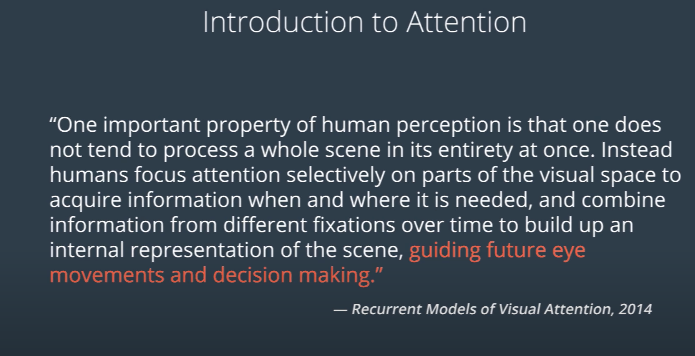

Lesson outline
In this lesson, we will learn about the attention mechanism. Specifically, we will talk about these topics:

- Encoders and decoders
- Text sentiment analysis
- Sequence to sequence
- Attention overview - encoding and decoding
- Attention encoder and decoder
- Bahdanau and Luong attention
- Additive attention
- Multiplicative attention
- Computer vision applications
- Other attention methods

## Sequence to Sequence Models
Before we jump into learning about attention models, let's recap what you've learned about sequence to sequence models. We know that RNNs excel at using and generating sequential data, and sequence to sequence models can be used in a variety of applications!

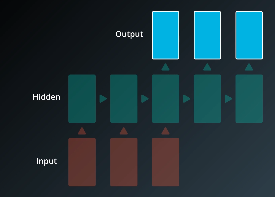

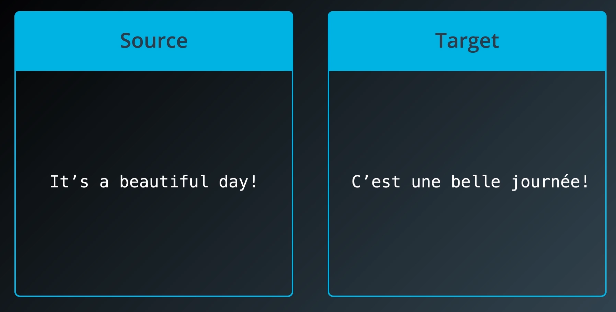 
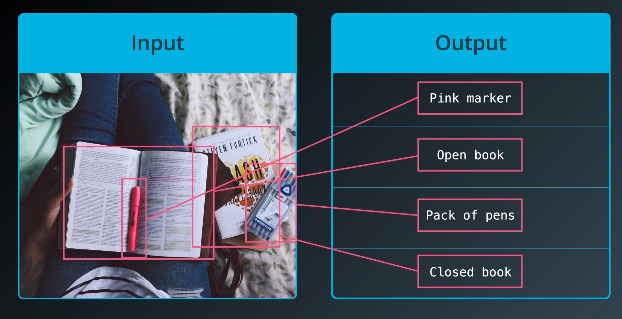

## Encoders and Decoders
The encoder and decoder do not have to be RNNs; they can be CNNs too!

In the example above, an LSTM is used to generate a sequence of words; LSTMs "remember" by keeping track of the input words that they see and their own hidden state.

In computer vision, we can use this kind of encoder-decoder model to generate words or captions for an input image or even to generate an image from a sequence of input words. We'll focus on the first case: generating captions for images, and you'll learn more about caption generation in the next lesson. For now know that we can input an image into a CNN (encoder) and generate a descriptive caption for that image using an LSTM (decoder).

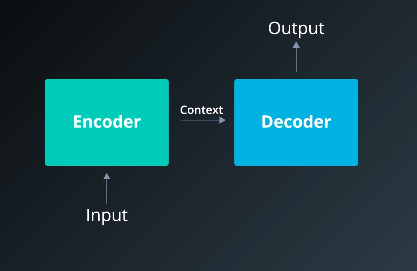  

If we go deeper then we can see that both encoder and decoder do have the loops in them as you can see in the image

Encoder : encoder and decoder both are RNNs. The encoder understand the input and give the context to the decoder and Decoder will generate the outputs. the context that being feed to the decoder remains same which we set during the building the model irrespective of the input or output size.

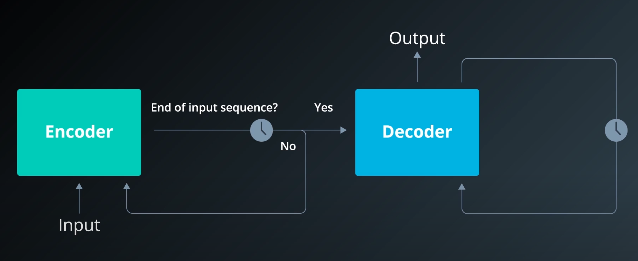 

For suppose the input is `How are you ?` in this context the `rnn` will take 4 time steps to process this through the encoder, each time it reads the input and process the hidden state and process to next time step. once it processes all the inputs then it will send the whole context to the decoder for generating the output.

Once the decoder receives the input from the encoder then it process the context through it's hidden state and then start generating the output.

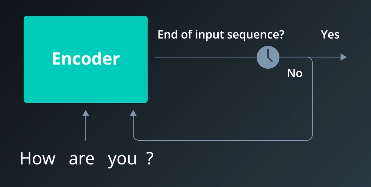

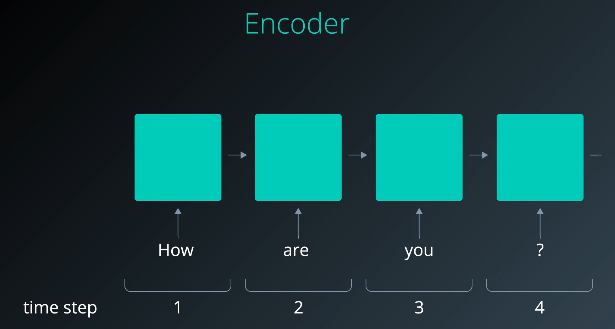 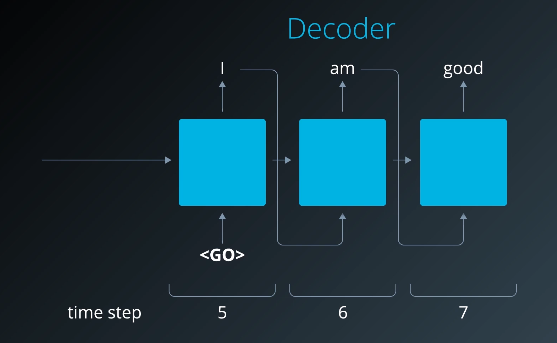

# Sequence to Sequence Recap

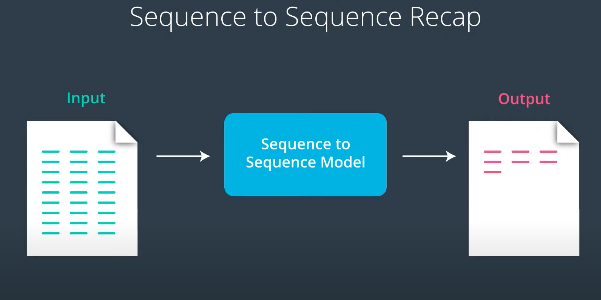 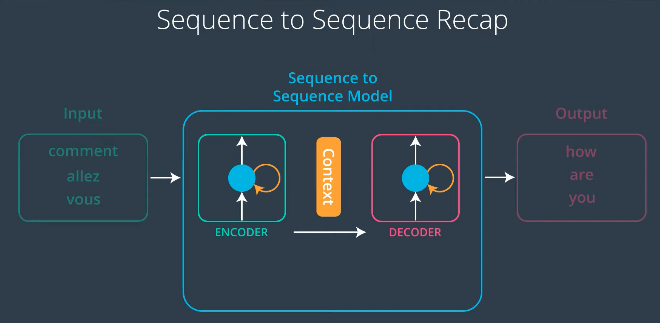 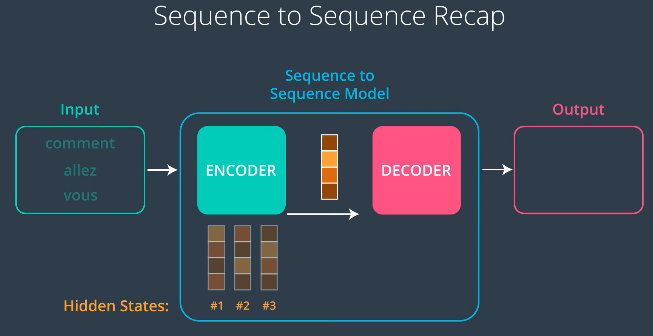

usually the encoder and decoders are RNNs and tipically LSTMs. The context is a vector which capture the context from the encoder. it would of the fixed length that we decide at the time of building the model.

`Choosing a reasonable context size for this vector makes the model have problems with long input sequences. Now one can say, let's just use a very large number of hidden units in the encoder so that the context is very large. But then your model overfits with short sequences, and you take a performance hit as you increase the number of parameters. This is the problem attention solves`




## Encoding -- Attention Overview

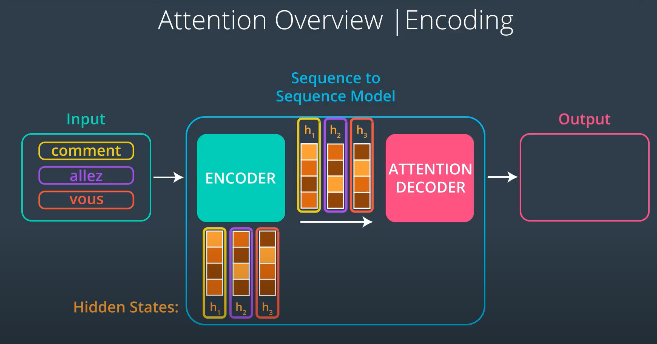 

In the `seq to seq problem without attention` we know that the context vector is fixed and final hidden state will be processed as a context to the decoder, where as in the model with attension will take all the hidden states as context from the encoder as it shows in the image

## Decoding -- Attention Overview

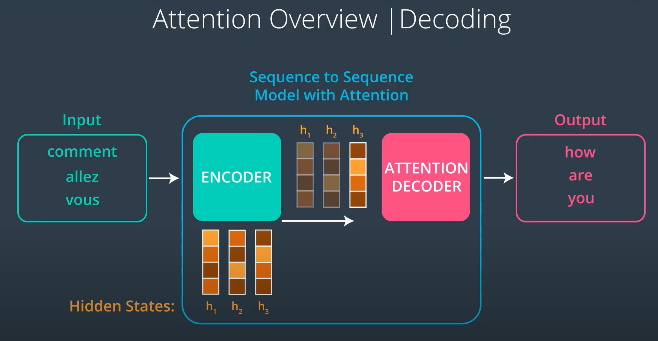

as we know that the decoder get the entire hidden states as a context, but the decoder attend to only the important parts of the context vector as per it's requirement. it learn some sophisticated behavior during the training.  

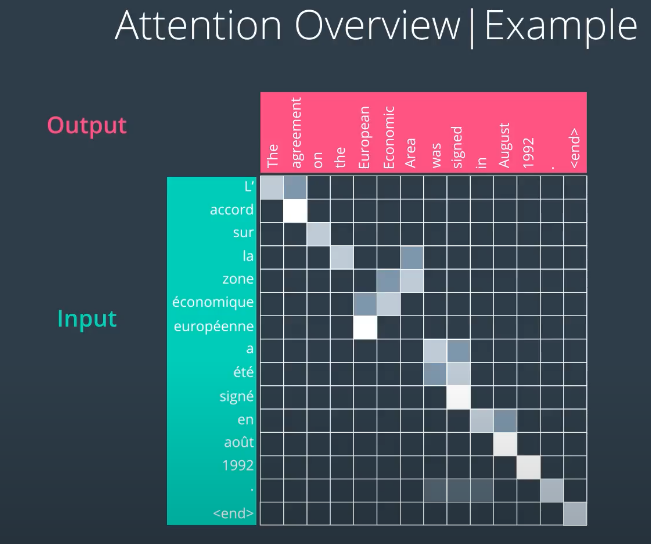

as we can see in the image that the attension decoder do not attend to the words one by one sequentially in the input context, some times it does understand the relationships between words during the training so it will attend to the parts which will have more priority in the output generated.



## Attention Encoder


Now that we've taken a high-level look at how attention works in a sequence to sequence model, let's look into it in more detail. We'll use machine translation as the example, as that's the application the main papers on attention tackled. But whatever we do here translates into other applications as well. It's important to note that there is a small variety of attention algorithms. We'll be looking at a simple one here.

Let's start from the Encoder. In this example, the Encoder is a recurrent neural network. When creating an RNN, we have to declare the number of hidden units in the RNN cell. This applies whether we have a vanilla RNN or an LSTM or GRU cell. Before we start feeding our input sequence words to the Encoder, they have to pass through an embedding process which translates each word into a vector. Here we can see the vector representing each of these words.

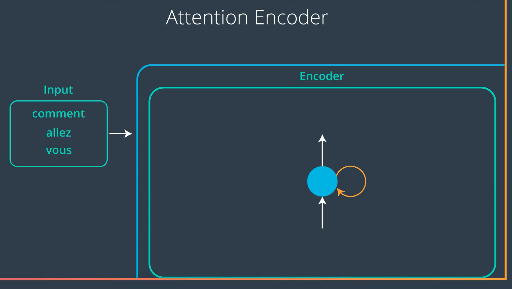 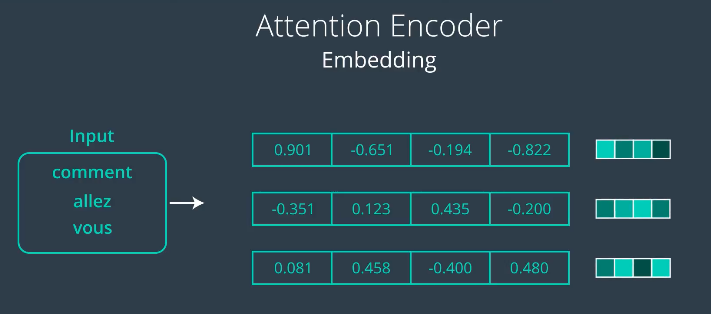

Now, this is a toy embedding of size four just for the purpose of easier visualization. In real-world applications, a size like 200 or 300 is more appropriate. We'll continue to use these color-coded boxes to represent the vectors, just so we don't have a lot of numbers plastered all over the screen. Now that we have our words and their embeddings, we're ready to feed that into our Encoder.

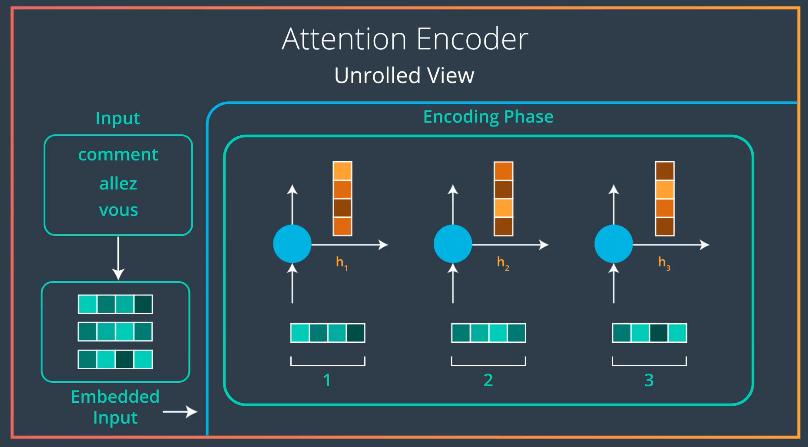

Feeding the first word into the first time step of the RNN produces the first hidden state. This is what's called an unrolled view of the RNN, where we can see the RNN at each time step. We'll hold onto this state and the RNN would continue to process the next time step. So, it would take the second word and pass it to the RNN at the second time step, and then it would do that with the third word as well. Now that we have processed the entire input sequence, we're ready to pass the hidden states to the attention decoder.



## Attention Decoder

without Attention decoder 

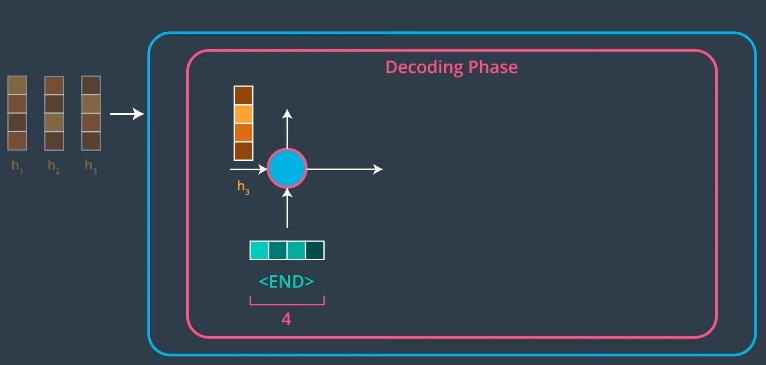

Below are with Attention in the Decoder

Let's now look at things on the decoder side. In models without attention, we'd only feed the last context vector to the decoder RNN, in addition to the embedding of the end token, and it will begin to generate an element of the output sequence at each time-step. The case is different in an attention decoder, however. An attention decoder has the ability to look at the inputted words and the decoder's own hidden state, and then it would do the following. It would use a scoring function to score each hidden state in the context matrix. We'll talk later about the scoring function, but after scoring, each context vector would end up with a certain score, and if we feed these scores into a softmax function, we end up with scores that are all positive, that are all between zero and one, and that all sum up to one.

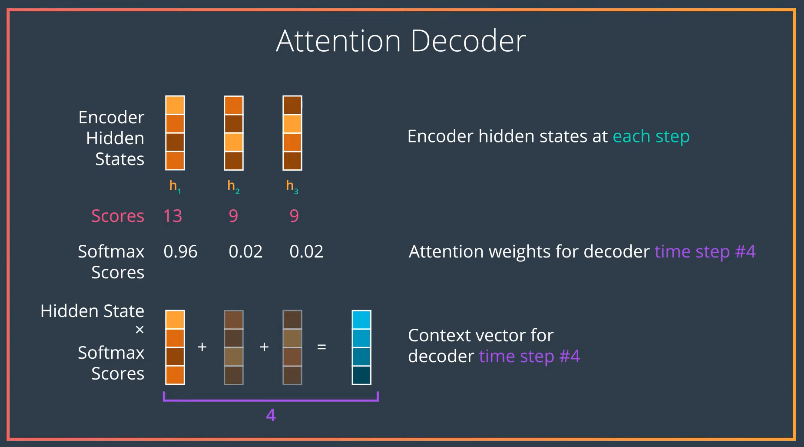 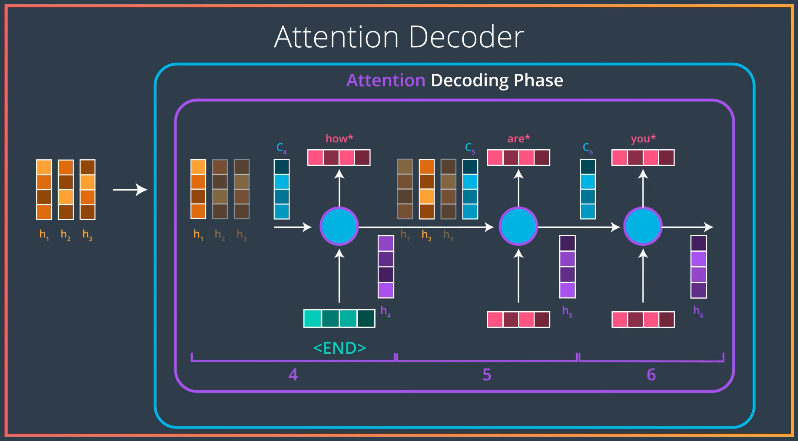

These values are how much each vector will be expressed in the attention vector that the decoder will look at before producing an output. Simply multiplying each vector by its softmax score and then summing up these vectors produces an attention context vector; this is a basic weighted sum operation. The context vector is an important milestone in this process, but it's not the end goal. In a later video, we'll explain how the context vector merges with the decoder's hidden state to create the real output of the decoder at the time-step. The decoder has now looked at the input word and at the attention context vector, which focused its attention on the appropriate place in the input sequence. So, it produces a hidden state and it produces the first word in the output sequence. Now, this is still an over-simplified look; that's why we have the asterisks here. There is still a step, whether we'll talk about in a later video, between the RNN and the final output. In the next time-step, the RNN takes its previous output as an input, and it generates its own context vector for that time-step, as well as the hidden state from the previous time-step, and that produces a new hidden state for the decoder and a new word in the output sequence, and this goes on until we've completed our output sequence.



## Bahdanau and Luong Attention

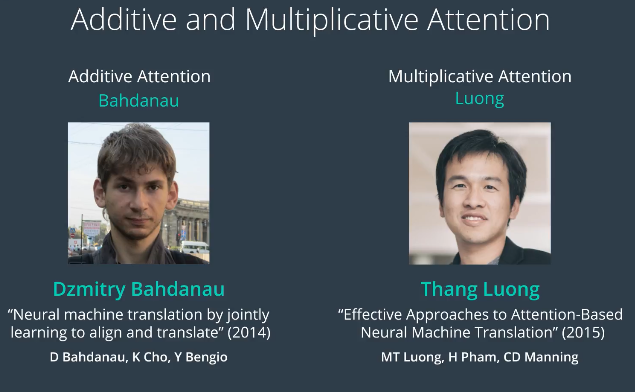 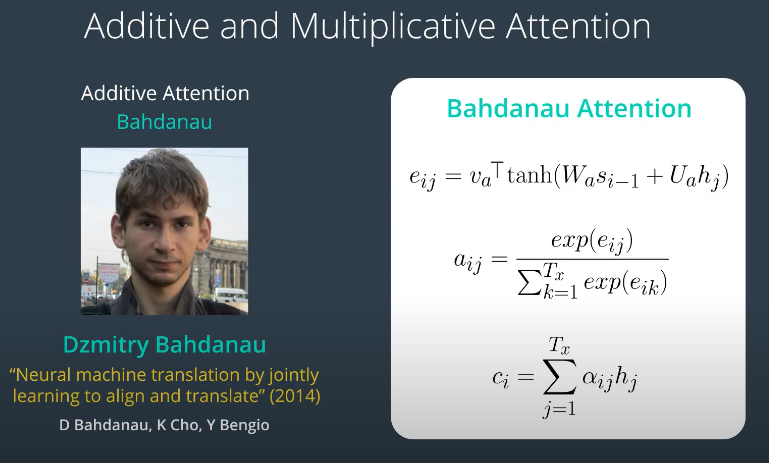 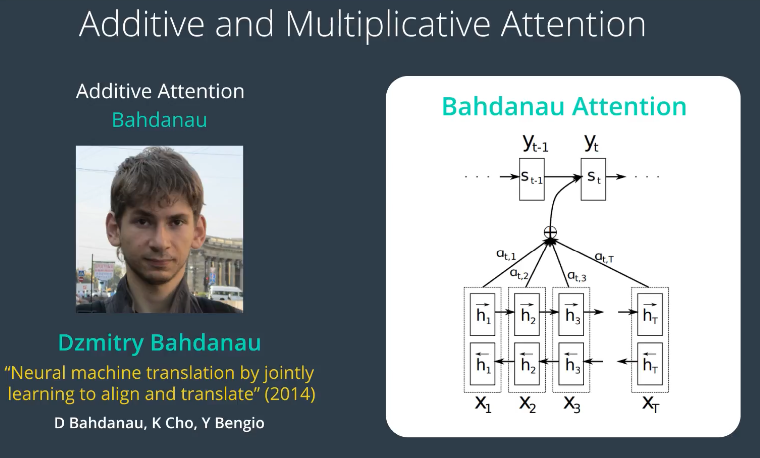

Before delving into the details of scoring functions, we need to make a distinction of the two major types of attention. These are often referred to as "Additive Attention and Multiplicative Attention." Sometimes they're also called "Bahdanau Attention" and "Luong Attention," referring to the first authors of the papers that described them. Bahdanau attention refers to Dzmitry Bahdanau, the first author of the paper, "Neural machine translation by jointly learning to align and translate," which proposed a lot of these ideas. The scoring function in Bahdanau attention looks like this, where h of j is the hidden state from the encoder, s of i minus one is the hidden state of the decoder in the previous time step. u of a, W of a, and v of a are all weight matrices that are learned during the training process. Basically, this is a scoring function, which takes the hidden state of the encoder, the hidden state of the decoder, and produces a single number for each decoder time step. If this looks too complicated, don't worry about it. We'll get into more detail and with a visual explanation as well. The scores are then passed into softmax, this is what softmax looks like, and then this is our weighted sum operation, where we multiply each encoder hidden state by its score, and then we sum them all up, producing our attention context vector. In their architecture, the encoder is a bidirectional RNN, and they produce the encoder vector by concatenating the states of these two layers.


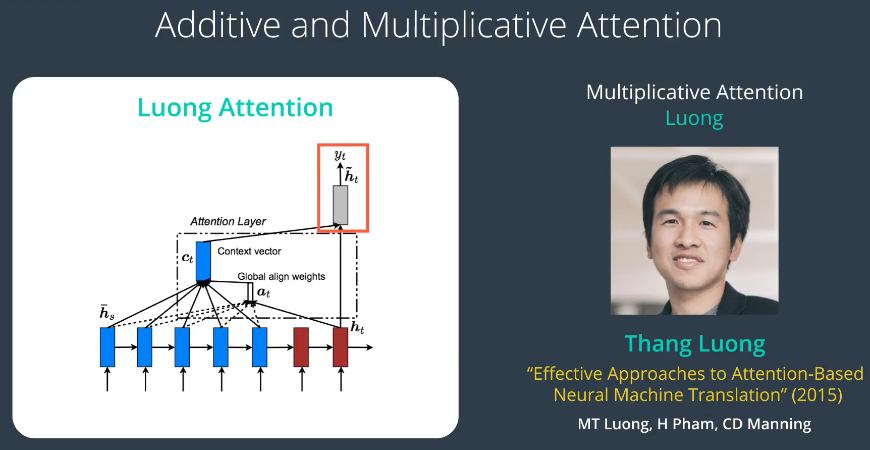 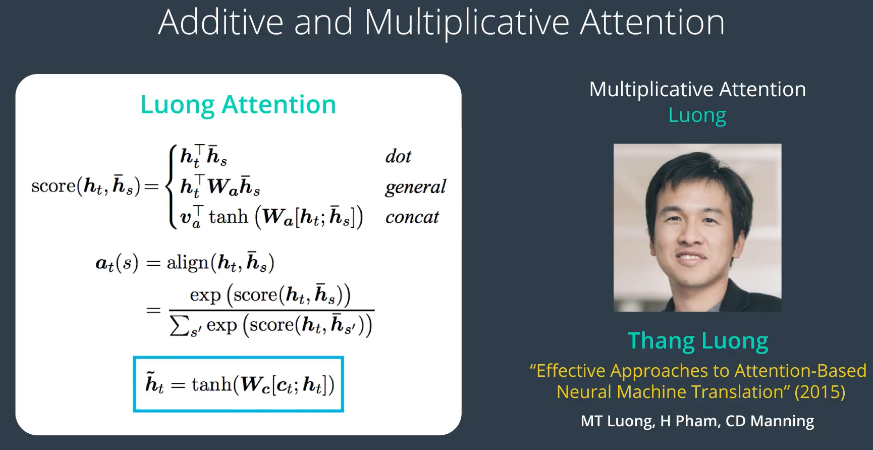 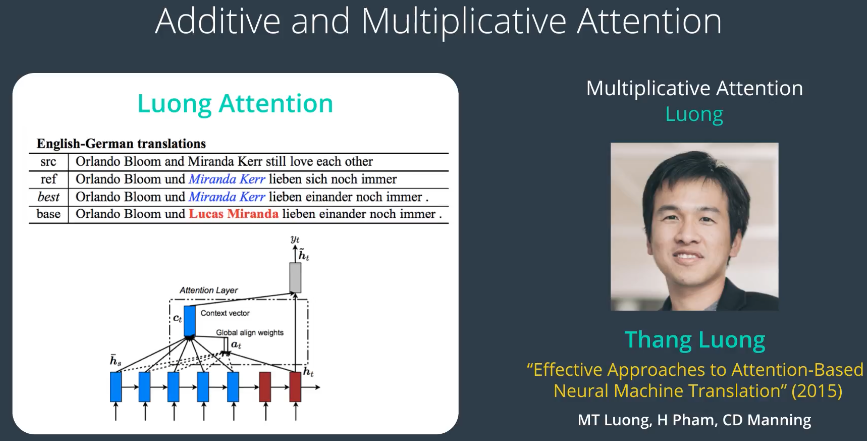

Multiplicative attention or Luong attention, referring to Thang Luong, the first author of the paper, "Effective Approaches to Attention-based Neural Machine Translation." Luong attention built on top of the Bahdanau attention by adding a couple more scoring functions. Their architecture is also different in that they used only the hidden states from the top RNN layer in the encoder. This allows the encoder and the decoder to both be stacks of RNNs, which we'll see later in the applications videos, which led to some of the premier models that are in production right now. The scoring functions in multiplicative attention are three that we can choose from. The simplest one is the dot scoring function, which is multiplying the hidden states of the encoder by the hidden state of the decoder. The second scoring function is called general; it builds on top of it and just adds a weight matrix between them, and this multiplication in the dot product is where multiplicative attention gets its name. The third is very similar to Bahdanau attention, in that it adds up the hidden state of the encoder with the hidden state of the decoder, and so this addition is where additive attention gets its name, then multiplies it by a weight matrix, applies a tanh activation, and then multiplies it by another weight matrix. So, this is a function that we give the hidden state of the decoder at this time step and the hidden states of the encoder at all the time steps, and it will produce a score for each one of them. We then do softmax just as we did before, and then that would produce c of t here; they are called the attention context vector, and so this is the step that would produce the final output of the decoder. Again, if this doesn't make a lot of sense right now, don't worry about it, we'll look at it more visually in the next video. This is an example from the paper that gives an illustration about attention methods compared to previous sequence to sequence models without attention. So, this is an English to German translation; this is the source English phrase, this is the reference, this is the label correct German translation, this is what their model did. So, it translated it very well, and this is the base or the benchmark model without attention, where we see it got the name Luong. This is something we can attribute to the difficulty of capturing all the information just in the last hidden state of the encoder. This is one of the powerful things that attention does. It gives the encoder the ability to look at parts of the input sequence, no matter how far back they were in the input sequence.

## Multiplicative Attention

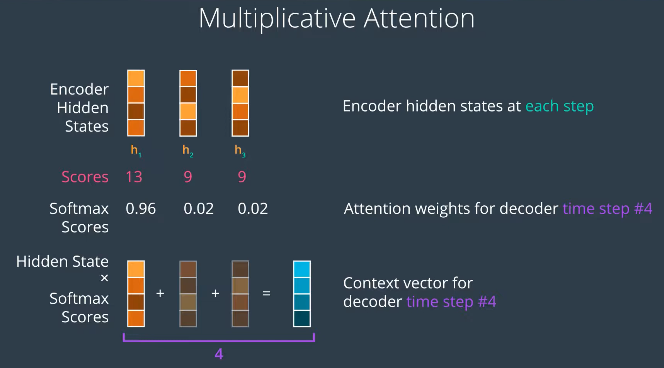 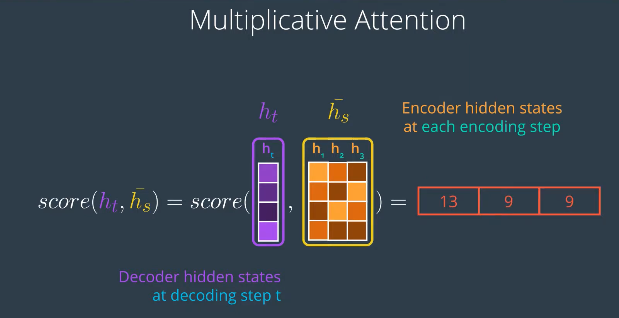 

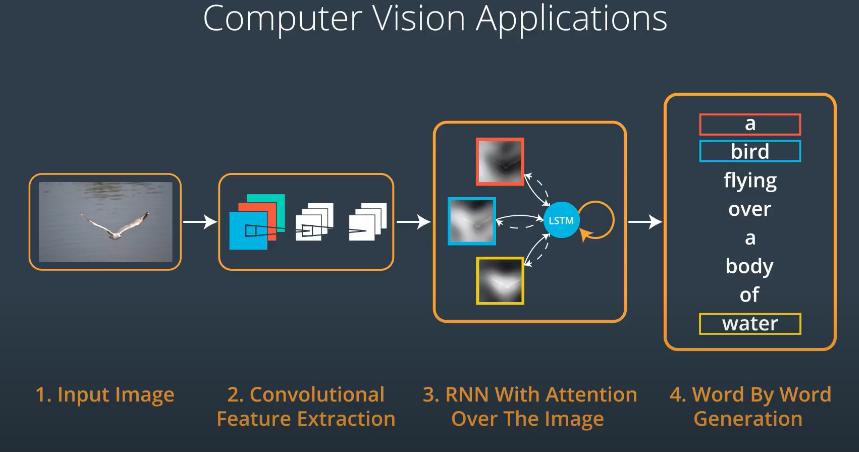